<a href="https://colab.research.google.com/github/tamandakaunda-15/Capstone_Assignment2_2026/blob/main/Capstone_ModelTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Predicting Adolescent School Dropout in Malawi**

 **Table of Contents**

Introduction

[Data Exploration](https://colab.research.google.com/drive/1p_bk_Wt4k1sM088jnBMEGsIe9LIvWgs0#scrollTo=d2T73qhXD0uX&line=1&uniqifier=1)


[Feature Selection and Importance ](https://colab.research.google.com/drive/1p_bk_Wt4k1sM088jnBMEGsIe9LIvWgs0#scrollTo=igcuNZWdFeL1&line=1&uniqifier=1)

[Exploratory Data Analysis](https://colab.research.google.com/drive/1p_bk_Wt4k1sM088jnBMEGsIe9LIvWgs0#scrollTo=z9C6S1UPLJ7-&line=1&uniqifier=1)

[Model Training](https://colab.research.google.com/drive/1p_bk_Wt4k1sM088jnBMEGsIe9LIvWgs0#scrollTo=__cSqP8bYW_7&line=1&uniqifier=1)

[Results & Conclusions
](https://colab.research.google.com/drive/1p_bk_Wt4k1sM088jnBMEGsIe9LIvWgs0#scrollTo=mFO_ClkEkR4X&line=1&uniqifier=1)

## **Introduction**

This project explores how machine learning can beused to predict adolescent dropout in Malawian Primary schools. This project utilizes the Longitudinal Study of Scooling Quality and Experience in Malawi (MSAS) student dataset collected over 6 rounds.

Data Source: [Havard Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi%3A10.7910%2FDVN%2FV4C81G&version=2.1) (Obtained with permission from the provider)

### ***Overview of the Files***

**MSAS_Round1-5_Clean.dta**: This is a large, consolidated dataset containing data collected from the first five rounds of the study. It includes information for 2694 students and features over 7,000 columns, tracking various metrics over time, such as school status, demographics, and personal health.

**MSAS_Round6.tab** Similar to the MSAS_Round1-5_Clean.dta, this is a second data file contains round 6 students data with 2148 students and features over 7,000 columns, tracking various metrics over time, such as school status, demographics, and personal health.

 **Adolescent Questionnaires (Rounds 1–6)** These PDF documents contain the actual survey instruments used to collect the data found in the CSV file. They cover a wide range of topics, including:


A. **Respondent Verification**: Age, schooling status, and place of residence.


B. **Schooling & Education**: Highest standard attended, exam results (like PSLCE), and reasons for school changes.


C. **Health & Wellness**: General health problems, malaria, and physical measurements (height/weight).


D. **Life Events:** Tracking significant milestones like leaving school, starting work, marriage, and childbirth.


E. **Social & Religious Practices:** Personal branding, religious activities, and community involvement.

**Disclaimer**: Dataset used has anonymized student names with unique IDs to protect the privacy of minors involved in the study.

## **1. Data Loading + Merging**

STep 1: load both the  **MSAS_Round1-5.dta** and the **MSAS_Round6.tab** student records datasets

In [ ]:
import pandas as pd

df_r1to5 = pd.read_stata('/content/MSAS_Round1-5.dta', convert_categoricals=False)
df_r1to5.to_csv('MSAS_Round1-5_again.csv', index=False)

print("Conversion complete! 'MSAS_Round1-5_again.csv' is now ready.")

Conversion complete! 'MSAS_Round1-5_again.csv' is now ready.


In [ ]:
df_new = pd.read_csv('MSAS_Round1-5_again.csv')

/tmp/ipython-input-571396341.py:1: DtypeWarning: Columns (4,29,34,467,492,522,698,770,786,787,788,789,790,866,871,886,900,1013,1064,1091,1479,1487,1560,1586,1611,1748,1750,1769,1835,1856,1966,2037,2043,2044,2045,2123,2128,2143,2157,2269,2301,2320,2694,2702,2798,2824,2835,2849,3007,3062,3079,3100,3250,3323,3329,3330,3331,3411,3431,3445,3557,3608,3964,4006,4055,4057,4185,4208,4219,4412,4421,4483,4488,4509,4537,4572,4607,4619,4681,4756,4762,4763,4764,4845,4856,4867,4878,4909,4933,5008,5011,5019,5041,5065,5073,5095,5282,5301,5680,5690,5700,5720,5750,5792,5809,5819,5830,5840,5848,5850,5860,5918,5937,5951,6164,6229,6270,6306,6319,6327,6421,6432,6442,6453,6480,6485,6628,6636,6658,6691,6842,6941,6966,6986) have mixed types. Specify dtype option on import or set low_memory=False.
  df_new = pd.read_csv('MSAS_Round1-5_again.csv')


In [ ]:
df_new.describe()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649 entries, 0 to 2648
Columns: 7241 entries, school_id to hsv2_final_result_R5
dtypes: float64(6917), int64(59), object(265)
memory usage: 146.3+ MB


In [ ]:
df_r6 = pd.read_table('MSAS_Round6.tab')

/tmp/ipython-input-789982485.py:1: DtypeWarning: Columns (17,27,37,47,70,159,172,246,351,371,402,441,474,564,571,583,645,649,657,733,784,818,938,1043,1044,1067,1068,1069,1070,1429,1430,1433,1452,1483,1489) have mixed types. Specify dtype option on import or set low_memory=False.
  df_r6 = pd.read_table('MSAS_Round6.tab')


In [ ]:
#Target column is reated from round 6 the final round
df_r6['target_r6'] = (df_r6['adol_school_status_LM_R6'] == 33).astype(int)

Step 2: combine the **MSAS_Round1-5_again.csv** (contains infor from round 1 to 5) for **2649 students** with **MSAS_Round6.tab** that contains round 6 students data with **2148 students.**

merge datasets

In [ ]:
df_master = pd.merge(df_r1to5, df_r6[['adol_id', 'target_r6']], on='adol_id', how='left')

In [ ]:
print(f"Merge Complete! Total Students: {len(df_master)}")
df_master.to_csv('MSAS_Master_Dataset.csv', index=False)

Merge Complete! Total Students: 2649


## 2. **Data** **Exploration**

this step looks at data distribution such as as number of rows, columns, outliers in age of the master merged dataset.

In [ ]:
print(df_master.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649 entries, 0 to 2648
Columns: 7242 entries, school_id to target_r6
dtypes: datetime64[ns](7), float32(60), float64(6795), int16(6), int32(1), int8(52), object(321)
memory usage: 144.7+ MB
None


In [ ]:
df_master.describe()

,school_id,adol_id,sample_source_R1,outsch_sampled_R1,complete_R1,partial_R1,incap_R1,died_R1,refused_R1,code30_R1,...,le4_23_R5,le4_34_R5,le4_45_R5,rechiv_R5,rechsv2_R5,hiv_final_code_R5,hiv_final_result_R5,hsv2_final_code_R5,hsv2_final_result_R5,target_r6
count,2649.000000,2649.000000,2649.000000,885.000000,2649.000000,2649.000000,2649.0,2649.0,2649.0,2649.0,...,2339.000000,2339.000000,2339.000000,1988.000000,1739.000000,2339.000000,1965.000000,2339.000000,1773.000000,2184.000000
mean,183.202341,165937.893545,1.334088,55.308475,0.999622,0.000378,0.0,0.0,0.0,0.0,...,5.661394,6.063702,6.698162,3.640342,1.457159,1.273194,2.036132,1.581445,1.949239,0.801282
min,101.000000,101102.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,116.000000,123109.000000,1.000000,3.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,...,2.000000,2.000000,3.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000
50%,232.000000,146140.000000,1.000000,88.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,...,9.000000,9.000000,9.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000
75%,246.000000,218105.000000,2.000000,99.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,...,9.000000,9.000000,9.000000,1.000000,1.000000,1.000000,2.000000,1.500000,2.000000,1.000000
max,260.000000,617102.000000,2.000000,99.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,...,9.000000,9.000000,9.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,1.000000
std,65.625763,56722.739333,0.471760,45.302288,0.019429,0.019429,0.0,0.0,0.0,0.0,...,3.475308,3.344845,2.950323,15.938985,10.534659,2.901611,2.191731,3.611314,2.334286,0.399127


Final dropout target criteria from Round 6 data only

In [ ]:
df_master['final_dropout_target'] = df_master['target_r6'].isna().astype(int)

# 3. Clean Age  to fix the '99' outlier
df_master = df_master[(df_master['adol_age_R1'] >= 11) & (df_master['adol_age_R1'] <= 21)]

print("--- New Verified Distribution ---")
print(df_master['final_dropout_target'].value_counts())

In [ ]:
academic_summary = df_master[['adol_age_R1', 'a4b_1_R2', 'a4b_1_R3', 'a4b_1_R4', 'a4b_1_R5']].describe()
print("\n--- Academic Factor Audit ---")
print(academic_summary)


--- Academic Factor Audit ---
       adol_age_R1
count  2604.000000
mean     14.967742
std       1.097493
min      11.000000
25%      14.000000
50%      15.000000
75%      16.000000
max      19.000000


### 3. **Data Cleaning + Filling NaNs**

This steps is all about removing outliers in our data and filling NaN values with the approprite metrics to create a balanced dataset.

In [ ]:
import numpy as np

# 1. Isolate the numeric factors(Target and ID columns)
X_all = df_master.select_dtypes(include=[np.number]).drop(
    columns=['final_dropout_target', 'target_r6', 'adol_id', 'mastery_target'],
    errors='ignore'
)
y = df_master['final_dropout_target']

In [ ]:
# 2. Fill NaNs with -1
X_clean = X_all.fillna(-1)

In [ ]:
print(f"Data Cleaned. Total features for analysis: {X_clean.shape[1]}")

Data Cleaned. Total features for analysis: 6912


## **3. Feature Importance** **& Selection**

Feature importance using RandomForest classifier to dertemine which features have the highest contribution to dropouts

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf_selector.fit(X_clean, y)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [ ]:
# Extract the Top 30 features by importance
importances = pd.Series(rf_selector.feature_importances_, index=X_clean.columns)
top_30_ml = importances.sort_values(ascending=False).head(30).index.tolist()

In [ ]:
print("\n--- Selected top features ---")
print(top_30_ml[:30])


--- Selected top features ---
['w13_girls_R5', 'v1_destcode_R5', 'timeend2_hour_LM_R5', 'b3d_LM_R5', 'aa4_1_R5', 'ok_b10_LM_R5', 'ok_b12_LM_R5', 'e1b_R5', 'language_R5', 'b14_LM_R5', 'ok_b3g_LM_R5', 'ok_b14_LM_R5', 'ok_b3c_LM_R5', 'b1c_LM_R5', 'timebeg_min_LM_R5', 'ok_b2e_LM_R5', 'le2a_4_R5', 'b9_LM_R5', 'adol_sex_LM_R5', 'b15_LM_R5', 'b2c_LM_R5', 'le2a_1_R5', 'year_lastint_R5', 'b6_LM_R5', 'intid_LE_R5', 'b3f_LM_R5', 'e13_R5', 'sex_LE_R5', 'c1_LM_R5', 'ok_b1d_LM_R5']


A manual selection based on academic factors, social and economic shocks that have also been known to influence dropout, according to  exisiting research.

In [ ]:
selected_more= [
'adol_sex_R1', 'adol_age_R1', 'district_R1', 'a4b_1_R5', 'b6_b_R1', 'b11_b_R1',
    # Academic Sequence (The 'Slide')
    'a4b_1_R2', 'a4b_1_R3', 'a4b_1_R4', # Verified Math across rounds
    'a4b_2_R4', 'a4b_3_R4', 'a4b_4_R4', 'a4b_5_R4',
    'adol_standard_LM_R5',
    # Corrected Social & Economic Shocks (Based on Search)
    'evermarried1', 'everbirth1',
    'g7_R4', 'g7_R5',               # Safety at school
    'i1_R4', 'i1_R5',               # Aspirations
    'a6_R4', 'aa6_1_R4',            # Teacher Support
    'p2_R4', 'p2_R5',               # Work/Labor Activity
    'p6_1_R4', 'p6_1_R5',           # Kind of work
    'b1_R1', 'b2_R1', 'b11_a_R1',   # Household Assets
    'V40_days_1_R3', 'p18_days_1_R4',
    'district_R2', 'district_R3']

In [ ]:
final_features70 = list(set(top_30_ml + selected_more))

Correlation matrix to dertemine the correlating the most to the target variable.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X_final = df_master[final_features70].apply(pd.to_numeric, errors='coerce').fillna(-1)
X_final['target'] = df_master['final_dropout_target']

In [ ]:
corr_matrix = X_final.corr()[['target']].sort_values(by='target', ascending=False)

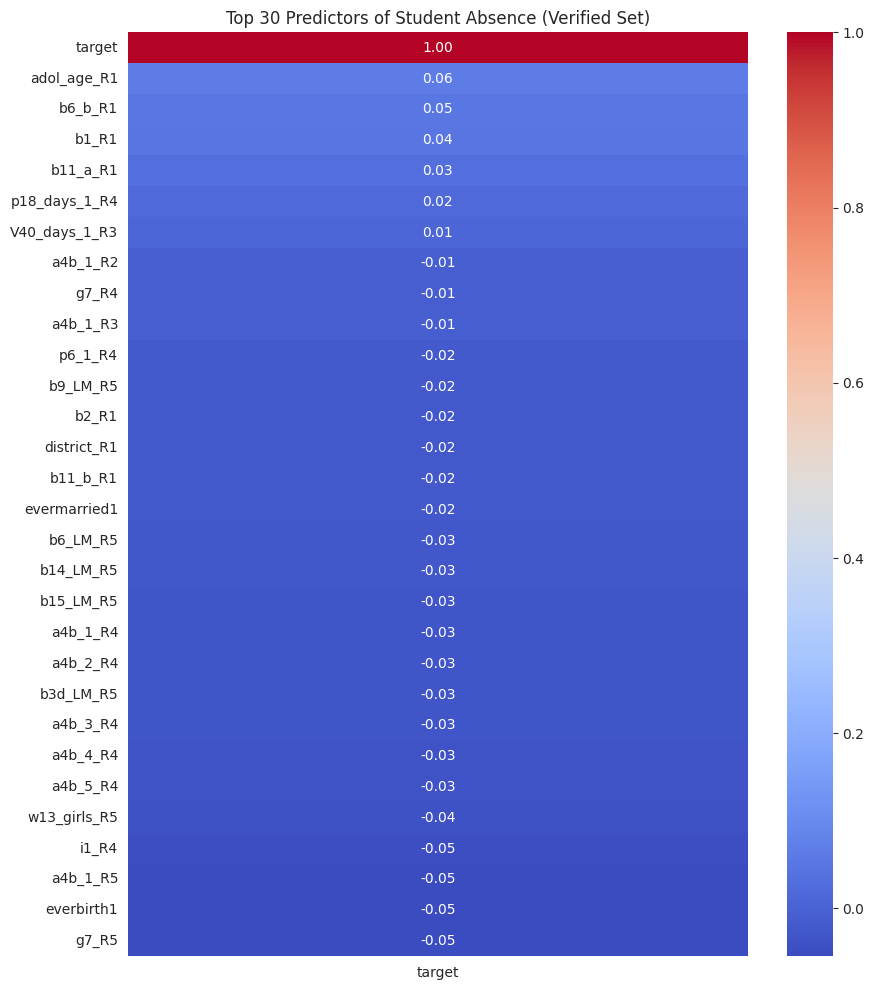

In [ ]:
# 3. Plot Top 30
plt.figure(figsize=(10, 12))
sns.heatmap(corr_matrix.head(30), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 30 Predictors of Student Absence (Verified Set)')
plt.show()

The correlation matrix shows a stong correlation between factors like adolescent age, grade by round 5 and  schooling status at round 5 with the mastery target column. Adolescent sex and birth status also shows a high correaltion. In a nut shell, most roung 5 variables shows a strong colleration to dropout. However the full set of 70 features will be used to give enough context to the model to capture multi-round temporal trends and socio-economic interactions that simple correlation analyis might overlook

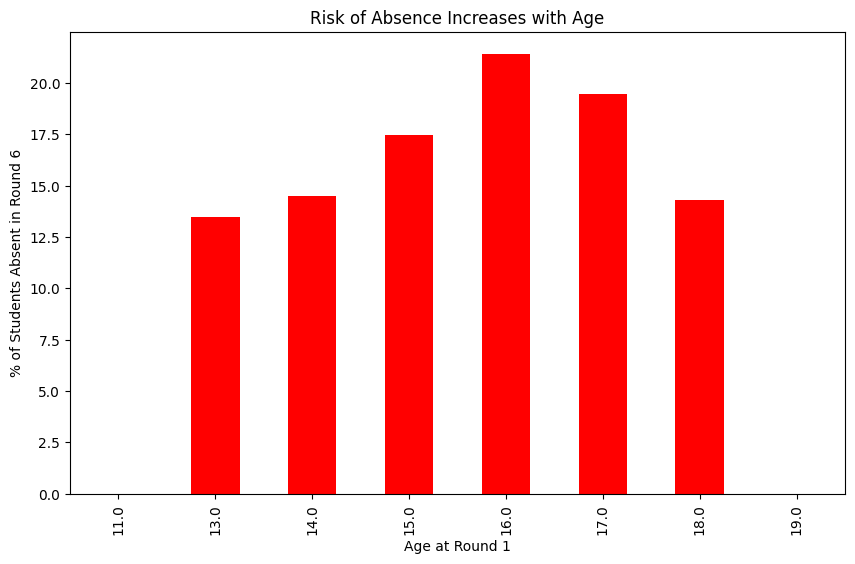

In [ ]:
# Calculate % Absent by Age
age_risk = df_master.groupby('adol_age_R1')['final_dropout_target'].mean() * 100

plt.figure(figsize=(10, 6))
age_risk.plot(kind='bar', color='red')
plt.title('Risk of Absence Increases with Age')
plt.xlabel('Age at Round 1')
plt.ylabel('% of Students Absent in Round 6')
plt.show()

4. ## **Exploratory Data Analysis**

This section highlights all the data analysis including visualizations to help better understand different characteristics associated with the dataset and visualization of key features that lead to dropouts. different graphs are plotted below.

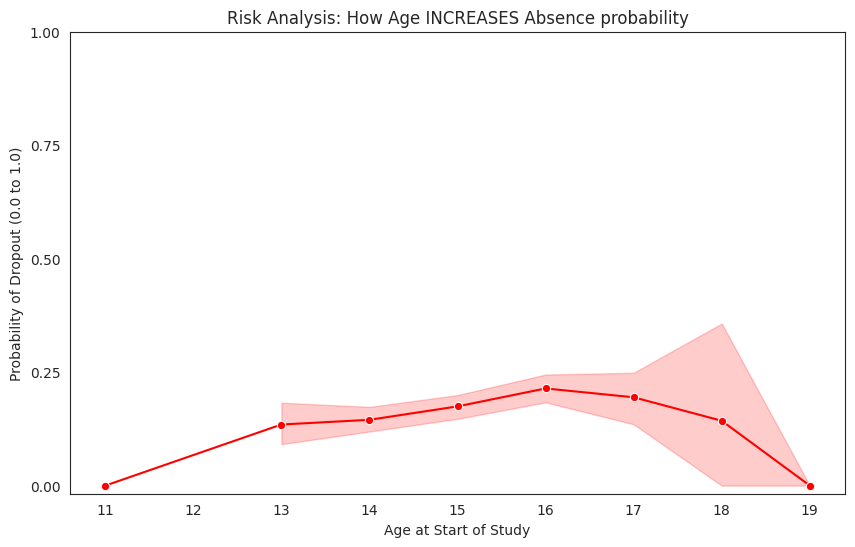

In [ ]:
# Showing the 'Increase' in risk
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_master, x='adol_age_R1', y='final_dropout_target', marker='o', color='red')
plt.title('Risk Analysis: How Age INCREASES Absence probability')
plt.ylabel('Probability of Dropout (0.0 to 1.0)')
plt.yticks([0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('Age at Start of Study')
plt.show()

**CHART 2**: A scatter plot that shows learner distribution by age and gender as they progress from Standard 4 to Standard 8 of the primary education

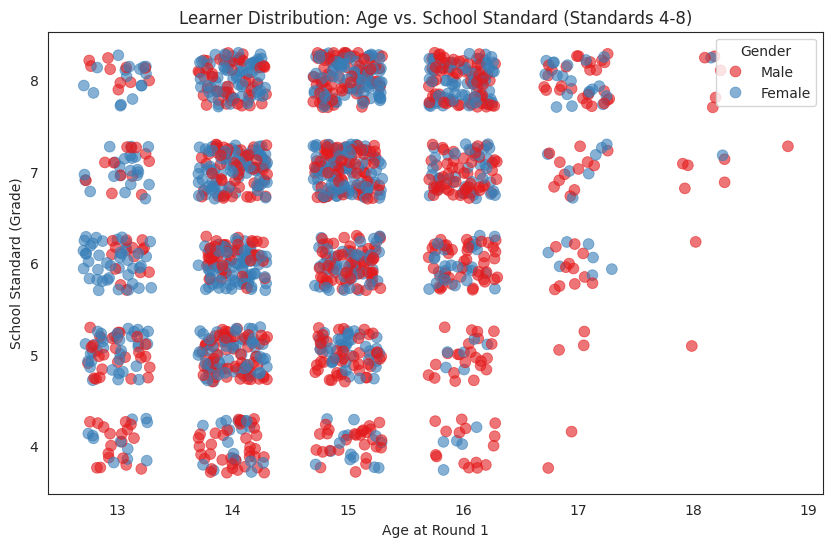

In [ ]:
df_master['gender'] = df_master['adol_sex_R1'].map({1: 'Male', 2: 'Female'})

# Convert 'adol_standard_R1' to numeric, coercing errors, then drop NaNs for filtering
df_master['adol_standard_R1'] = pd.to_numeric(df_master['adol_standard_R1'], errors='coerce')

# 3. transition years (Primary Standards 4-8) filtering
df_plot = df_master.dropna(subset=['adol_standard_R1']).copy()
df_plot = df_plot[(df_plot['adol_standard_R1'] >= 4) & (df_plot['adol_standard_R1'] <= 8)].copy()

# 4. Jitter- density of students at each age/grade visible
df_plot['age_jitter'] = df_plot['adol_age_R1'] + np.random.uniform(-0.3, 0.3, len(df_plot))
df_plot['std_jitter'] = df_plot['adol_standard_R1'] + np.random.uniform(-0.3, 0.3, len(df_plot))

# 5. Create the Visualization
plt.figure(figsize=(10, 6))
sns.set_style("white")

sns.scatterplot(
    x=df_plot['age_jitter'],
    y=df_plot['std_jitter'],
    hue=df_plot['gender'],
    alpha=0.6,
    s=60,
    edgecolor=None,
    palette='Set1'
)

plt.title('Learner Distribution: Age vs. School Standard (Standards 4-8)')
plt.xlabel('Age at Round 1')
plt.ylabel('School Standard (Grade)')

#  axis ticks to match actual school standards and ages
plt.yticks([4, 5, 6, 7, 8])
plt.xticks(range(int(df_plot['adol_age_R1'].min()), int(df_plot['adol_age_R1'].max()) + 1))

plt.grid(False)
plt.legend(title='Gender', loc='upper right')
plt.show()

Interpretation of this scatterplot above: Clustered to the far right is a number of students who are older in age and in classes like Standard 5 and 6. Most students are clustered mostly in the middle and between ages 13 to 16 which is the standard primary school age in Malawi.

**CHART 3**: A boxplot showing the distribution of age and outliers by Gender

/tmp/ipython-input-2165951722.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='gender', y='adol_age_R1', palette='Set2', width=0.5)


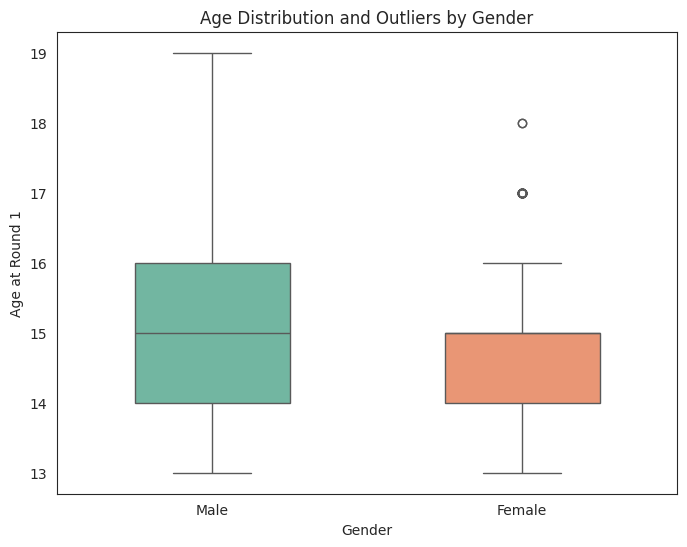

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_style("white")

sns.boxplot(data=df_plot, x='gender', y='adol_age_R1', palette='Set2', width=0.5)

plt.title('Age Distribution and Outliers by Gender')
plt.xlabel('Gender')
plt.ylabel('Age at Round 1')
plt.grid(False)
plt.show()

**CHART 4:** A piechart showing the distribution of make and female students in this study

**Pie chart 1** to show the distribution of male and female students as indicated in the **'adol_sex_R1'** column of our dataset

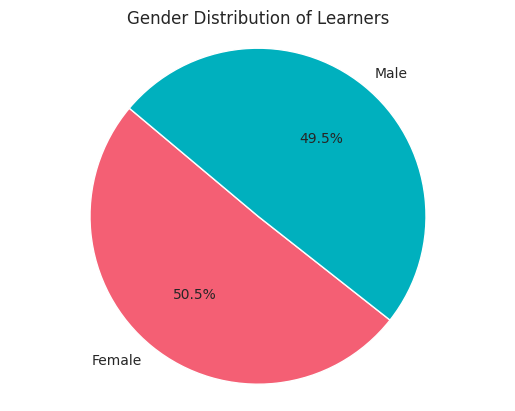

In [ ]:
# 1. Map Gender for the chart
gender_map = {1: 'Male', 2: 'Female'}
df_master['gender'] = df_master['adol_sex_R1'].map(gender_map)

gender_counts = df_master['gender'].value_counts()

# Plot the pie chart
plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#f45f74','#00b0be'])

plt.title('Gender Distribution of Learners')
plt.axis('equal')
plt.show()

/tmp/ipython-input-2415944597.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_master, x='Status', palette=['#66ddff', '#ff0000'])


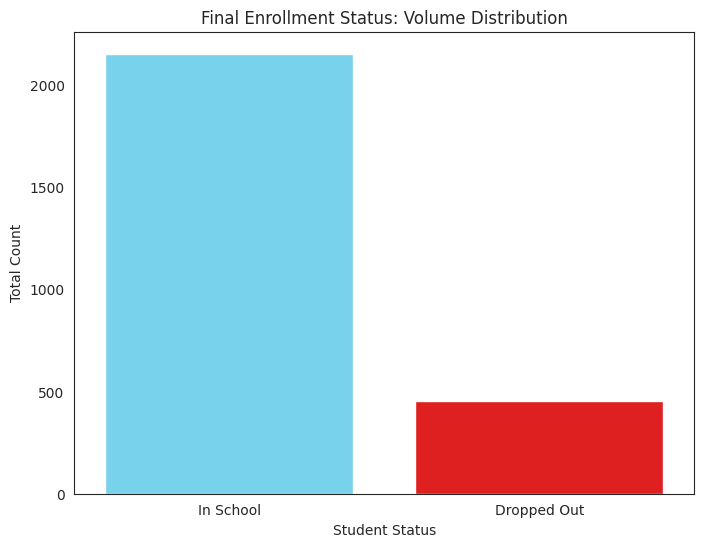

In [ ]:
# 1. Create the Status label based on your clean 0/1 target
# 0 = In School/Present, 1 = Absent/Dropped Out
df_master['Status'] = df_master['final_dropout_target'].map({0: 'In School', 1: 'Dropped Out'})

# --- CHART 1: Bar Chart (Volume) ---
plt.figure(figsize=(8, 6))
sns.set_style("white")
sns.countplot(data=df_master, x='Status', palette=['#66ddff', '#ff0000'])

plt.title('Final Enrollment Status: Volume Distribution')
plt.xlabel('Student Status')
plt.ylabel('Total Count')
plt.grid(False)
plt.show()


**Pie Chart 2** shows the percentage of dropouts vs in school learner distribution by round 6

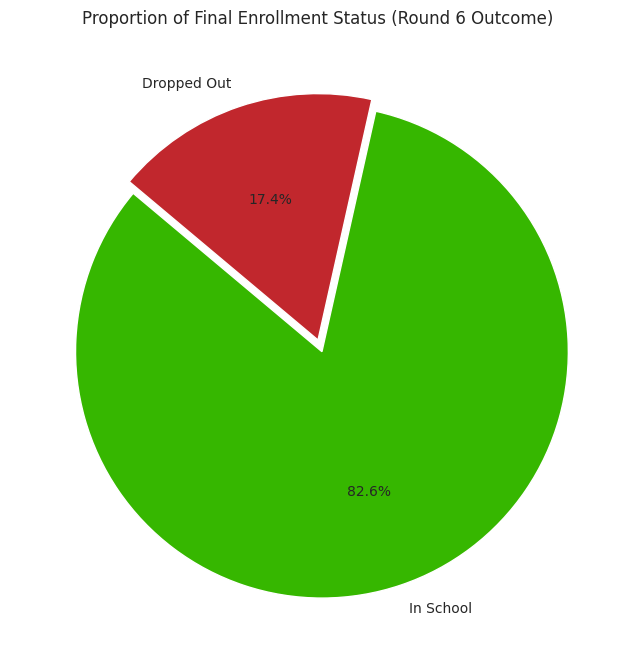

In [ ]:
status_counts = df_master['Status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(status_counts,
        labels=status_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#36b700', '#c1272d'],
        explode=(0.05, 0))

plt.title('Proportion of Final Enrollment Status (Round 6 Outcome)')
plt.show()

**PIE CHART 3**: Gender distribution among dropouts, checking to see how many of the students that dropped out were females.

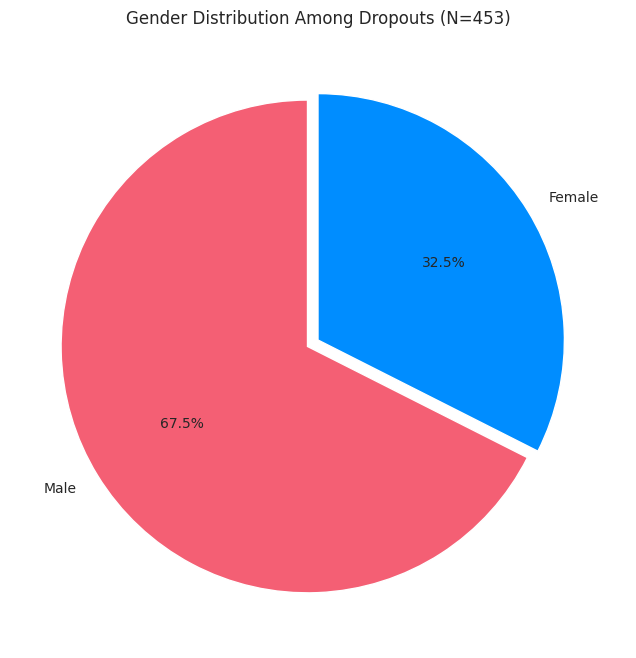

Total Female Dropouts: 147
Female Dropouts who reported Childbirth: 14


In [ ]:
# 1. Filter the dataset for the 453 dropouts in Round 6
df_dropouts = df_master[df_master['final_dropout_target'] == 1].copy()

# 2. Map the gender codes for the chart
df_dropouts['gender_label'] = df_dropouts['adol_sex_R1'].map({1: 'Male', 2: 'Female'})

# 3. Calculate counts
dropout_gender_counts = df_dropouts['gender_label'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(dropout_gender_counts,
        labels=dropout_gender_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#f45f74', '#008dff'],
        explode=(0.05, 0))

plt.title('Gender Distribution Among Dropouts (N=453)')
plt.show()

# Checking how many of those female dropouts had 'everbirth1' == 1
if 'everbirth1' in df_dropouts.columns:
    females_who_gave_birth = df_dropouts[(df_dropouts['gender_label'] == 'Female') & (df_dropouts['everbirth1'] == 1)]
    print(f"Total Female Dropouts: {len(df_dropouts[df_dropouts['gender_label'] == 'Female'])}")
    print(f"Female Dropouts who reported Childbirth: {len(females_who_gave_birth)}")

Categorical encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
X_subset = df_master[final_features70].copy()
categorical_cols = X_subset.select_dtypes(include=['object']).columns.tolist()

In [ ]:
le = LabelEncoder()
for col in categorical_cols:
    X_subset[col] = X_subset[col].astype(str).fillna('Missing')
    X_subset[col] = le.fit_transform(X_subset[col])

In [ ]:
X_final_encoded = X_subset.apply(pd.to_numeric, errors='coerce').fillna(-1)
y = df_master['final_dropout_target']

print(f"Success! Prepared {X_final_encoded.shape[1]} features for modeling.")
print(f"Categorical features encoded: {categorical_cols}")

Success! Prepared 63 features for modeling.
Categorical features encoded: ['a4b_1_R5', 'a4b_1_R3', 'a4b_4_R4', 'a4b_1_R4', 'a4b_1_R2', 'a4b_5_R4', 'a4b_2_R4', 'a4b_3_R4']


In [ ]:
y = df_master['final_dropout_target']

features_no_r6 = [f for f in final_features70 if '_R6' not in f]

X = df_master[features_no_r6].copy()
X_final = X.apply(pd.to_numeric, errors='coerce').fillna(-1)

print(f"Training on {X_final.shape[0]} students with {X_final.shape[1]} prior-round features.")

Training on 2604 students with 63 prior-round features.


## 6.**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
X = X_final_encoded
y = df_master['final_dropout_target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

In [ ]:
print("--- Data Split Summary ---")
print(f"Total Students: {len(X)}")
print(f"Training Set Size: {len(X_train)} ({y_train.sum()} dropouts)")
print(f"Testing Set Size:  {len(X_test)} ({y_test.sum()} dropouts)")

# 4. Verify Proportions
print(f"\nTraining Dropout Rate: {y_train.mean():.2%}")
print(f"Testing Dropout Rate:  {y_test.mean():.2%}")

--- Data Split Summary ---
Total Students: 2604
Training Set Size: 2083 (362 dropouts)
Testing Set Size:  521 (91 dropouts)

Training Dropout Rate: 17.38%
Testing Dropout Rate:  17.47%


1. Random Forest Classifier model architecture

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=300, class_weight='balanced', max_depth=12, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=300,
                       random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print("Model training complete")

Model training complete


--- INITIAL PERFORMANCE METRICS ---
Global Accuracy: 83.88%

Detailed Report:
              precision    recall  f1-score   support

   In School       0.88      0.93      0.91       430
 Dropped Out       0.56      0.38      0.45        91

    accuracy                           0.84       521
   macro avg       0.72      0.66      0.68       521
weighted avg       0.82      0.84      0.83       521



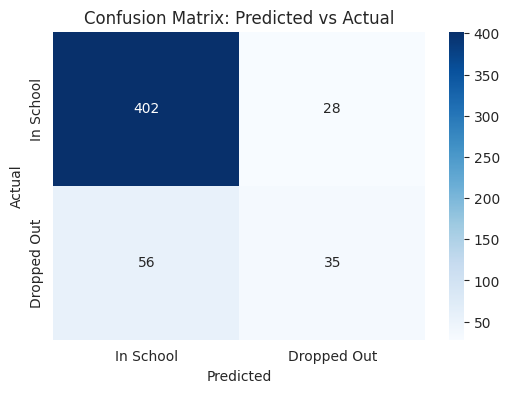

In [ ]:
print("--- INITIAL PERFORMANCE METRICS ---")
print(f"Global Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nDetailed Report:")
print(classification_report(y_test, y_pred, target_names=['In School', 'Dropped Out']))

# Confusion Matrix (The 'Truth' Table)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['In School', 'Dropped Out'], yticklabels=['In School', 'Dropped Out'])
plt.title('Confusion Matrix: Predicted vs Actual')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# 3. Train
log_model.fit(X_train_scaled, y_train)

# 4. Predict
y_pred_log = log_model.predict(X_test_scaled)

print("--- LOGISTIC REGRESSION PERFORMANCE ---")
print(classification_report(y_test, y_pred_log, target_names=['In School', 'Dropped Out']))

--- LOGISTIC REGRESSION PERFORMANCE ---
              precision    recall  f1-score   support

   In School       0.92      0.73      0.81       430
 Dropped Out       0.35      0.68      0.46        91

    accuracy                           0.72       521
   macro avg       0.63      0.71      0.64       521
weighted avg       0.82      0.72      0.75       521



In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=220,
    max_depth=6,
    learning_rate=0.001,
    scale_pos_weight=4.8,
    random_state=42
)

xgb_model.fit(X_train, y_train
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.001, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=220,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
print("XG BOOST PERFORMANCE REPORT")
print(classification_report(y_test, y_pred_xgb, target_names=['In School', 'Dropped Out']))

XG BOOST PERFORMANCE REPORT
              precision    recall  f1-score   support

   In School       0.93      0.66      0.77       430
 Dropped Out       0.32      0.76      0.45        91

    accuracy                           0.68       521
   macro avg       0.62      0.71      0.61       521
weighted avg       0.82      0.68      0.72       521



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 1. Architecture: Deep Neural Network with Dropout
model_dl = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_dl.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# 4. Predict (Using 0.5 threshold)
y_pred_dl = (model_dl.predict(X_test_scaled) > 0.5).astype(int)

print("\n--- ADVANCED DEEP LEARNING PERFORMANCE ---")
print(classification_report(y_test, y_pred_dl))

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8091 - loss: 0.4891 - val_accuracy: 0.7560 - val_loss: 0.5135
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8447 - loss: 0.4170 - val_accuracy: 0.7703 - val_loss: 0.5028
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8470 - loss: 0.3978 - val_accuracy: 0.7703 - val_loss: 0.4940
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8656 - loss: 0.3770 - val_accuracy: 0.7847 - val_loss: 0.4880
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8363 - loss: 0.4145 - val_accuracy: 0.7799 - val_loss: 0.4947
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8613 - loss: 0.3601 - val_accuracy: 0.7751 - val_loss: 0.4877
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8538 - loss: 0.3957 - val_accuracy: 0.7751 - val_loss: 0.4970
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8564 - loss: 0.3762 - val_accuracy: 0.7751 - val_loss: 0.4935


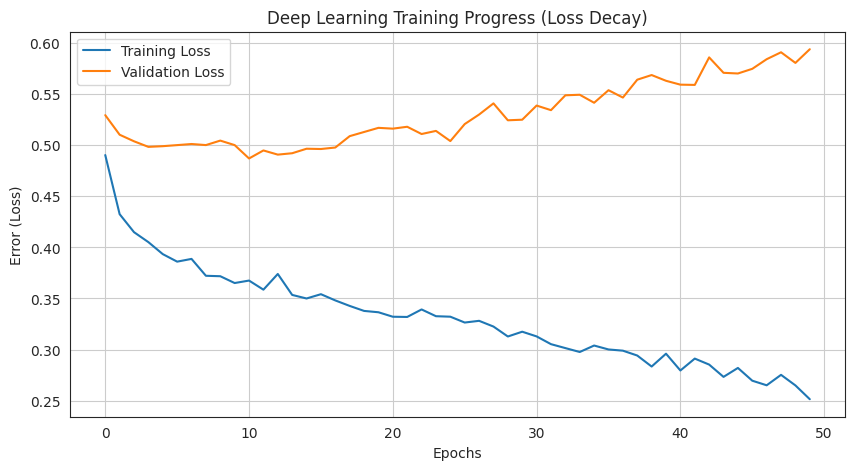

In [ ]:
import matplotlib.pyplot as plt

# Plot the Training & Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Deep Learning Training Progress (Loss Decay)')
plt.xlabel('Epochs')
plt.ylabel('Error (Loss)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# 1. Reshape data for the LSTM input (Batch, Timesteps, Features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# 2. Hybrid Architecture
model_hybrid = Sequential([
    # LSTM Layer: Captures temporal signals
    LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=False),
    BatchNormalization(),
    # DNN Layers: High-level feature extraction
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),


    Dense(1, activation='sigmoid')
])
optimizer = Adam(learning_rate=0.001)
model_hybrid.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history_hybrid = model_hybrid.fit(
    X_train_lstm, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5903 - loss: 0.6803 - val_accuracy: 0.8082 - val_loss: 0.5656
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8518 - loss: 0.4022 - val_accuracy: 0.8201 - val_loss: 0.5339
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8371 - loss: 0.4207 - val_accuracy: 0.8034 - val_loss: 0.5054
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8470 - loss: 0.3705 - val_accuracy: 0.8058 - val_loss: 0.4937
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8446 - loss: 0.3822 - val_accuracy: 0.8106 - val_loss: 0.4616
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8443 - loss: 0.3859 - val_accuracy: 0.8010 - val_loss: 0.4571
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8558 - loss: 0.3496 - val_accuracy: 0.8058 - val_loss: 0.4429
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8475 - loss: 0.3436 - val_accuracy: 0.8129 - 

In [ ]:
y_probs_hybrid = model_hybrid.predict(X_test_lstm)
y_pred_hybrid = (y_probs_hybrid > 0.5).astype(int)

from sklearn.metrics import classification_report
print("--- LSTM-DNN HYBRID PERFORMANCE ---")
print(classification_report(y_test, y_pred_hybrid))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
--- LSTM-DNN HYBRID PERFORMANCE ---
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       430
           1       0.38      0.35      0.36        91

    accuracy                           0.79       521
   macro avg       0.62      0.61      0.62       521
weighted avg       0.78      0.79      0.78       521



## **Results Analysis**

XG Boost seem to be the best choice and has the highest recall of 76% (meaning out of 100 students, it only misses 24 of them) among the five model architecture namely : LSTM-DNN, Random Forest,Logistic Regression, Advanced Deep Neural Network and the XG Boost because:

1. Sensitivity (Recall) is a priority in social impact project settings like predicitng student dropout because a False Negative (missing a student who drops) is much more expensive that a False Positive(giving support to a student who might have stayed).

2. Model explainability: XB Boost provides Odds Ratios whereby it has the ability to inform teachers why the student might be at risk of dropping out considering the relaitivty between their age and class/standard, where as deep learning models are blak boxes.

 3. XG Boost has the ability to be scalable, meaning if more data is added, it can handle the complexity much more that a logistic regression, which is a linear model.

 4. it saves 8% more students than the linear regression model. meaning in a primary school setting, 8 more students are retained and saved from dropout because we successfully flagged them.

Recall comparison visualizations for the 5 models

In [ ]:
model_data = {
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'XGBoost',
        'Advanced DL (Keras)',
        'LSTM-DNN Hybrid'
    ],
    'Accuracy': [0.72, 0.84, 0.68, 0.82, 0.79],
    'Recall': [0.68, 0.38, 0.76, 0.24, 0.35]
}

df_results = pd.DataFrame(model_data)

/tmp/ipython-input-1938983032.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  recall_plot = sns.barplot(


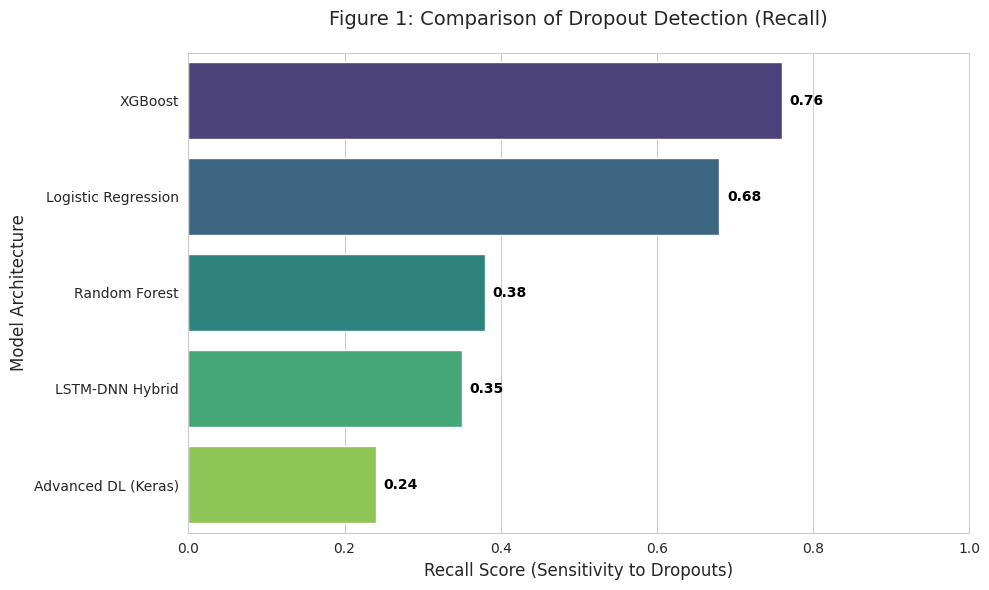

In [ ]:
df_recall = df_results.sort_values(by='Recall', ascending=False)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
recall_plot = sns.barplot(
    x='Recall',
    y='Model',
    data=df_recall,
    palette='viridis'
)

for i, v in enumerate(df_recall['Recall']):
    recall_plot.text(v + 0.01, i, f'{v:.2f}', color='black', va='center', fontweight='bold')

plt.title('Figure 1: Comparison of Dropout Detection (Recall)', fontsize=14, pad=20)
plt.xlabel('Recall Score (Sensitivity to Dropouts)', fontsize=12)
plt.ylabel('Model Architecture', fontsize=12)
plt.xlim(0, 1.0)
plt.tight_layout()
plt.savefig('recall_comparison.png', dpi=300) # High resolution for your thesis
plt.show()

/tmp/ipython-input-1752164136.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  acc_plot = sns.barplot(


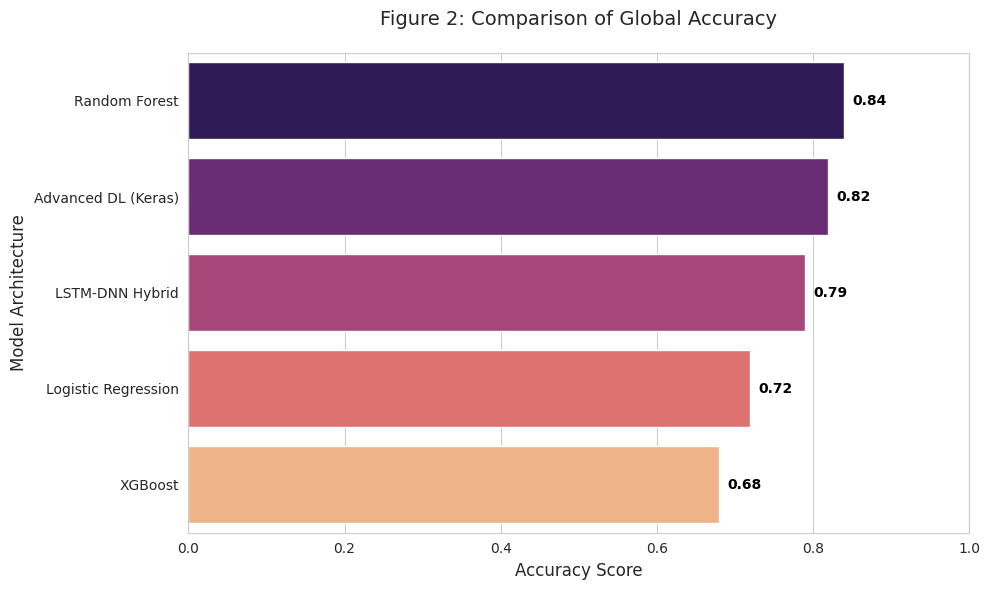

In [ ]:
df_acc = df_results.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
acc_plot = sns.barplot(
    x='Accuracy',
    y='Model',
    data=df_acc,
    palette='magma'
)

# Data labels on the bar
for i, v in enumerate(df_acc['Accuracy']):
    acc_plot.text(v + 0.01, i, f'{v:.2f}', color='black', va='center', fontweight='bold')

plt.title('Figure 2: Comparison of Global Accuracy', fontsize=14, pad=20)
plt.xlabel('Accuracy Score', fontsize=12)
plt.ylabel('Model Architecture', fontsize=12)
plt.xlim(0, 1.0)
plt.tight_layout()
plt.savefig('accuracy_comparison.png', dpi=300)
plt.show()

**The models Random Forest and Adavanced Keras have a very high accuracy but their low recall values make them less appropriate for this school dropout prediction as they could miss out on a lot of students who might be at risk of droppoing out**. For instance, **Advanced Kera's recall of 24 means that out of 100 students who are at risk of dropout, this model only identifies 24 of them,** thereby making it unsuitable for predicitve modellling in this case.

In [ ]:
# saving the highest perfoming model
import joblib

In [ ]:
joblib.dump(xgb_model, 'liftEd_xgb.pkl')

['liftEd_xgb.pkl']

In [ ]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']